<a href="https://colab.research.google.com/github/mohitphulsunge/DataScience-MachineLearning/blob/main/SVM_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions

Import the dataset

In [ ]:
dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


Standarize the data

In [ ]:
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

Visualize

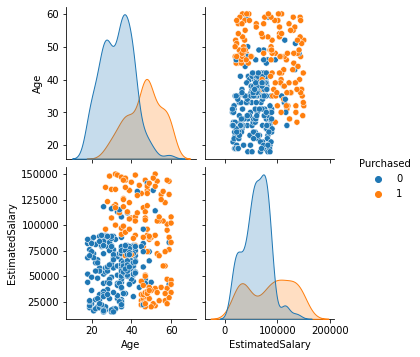

In [ ]:
sns.pairplot(data=dataset, hue="Purchased")

Split into train set and test set

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, random_state=0)

Using SVM

In [ ]:
# classifier = SVC(kernel="linear", random_state=0)
classifier = SVC(C=1, kernel="linear", random_state=0)
classifier.fit(X_train, Y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

View prediction

In [ ]:
print(confusion_matrix(Y_test, classifier.predict(X_test)))
print(classification_report(Y_test, classifier.predict(X_test)))
print(classifier.coef_)
# print(classifier.dual_coef_)

[[66  2]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100

[[1.66206026 0.95914215]]


Visualize

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


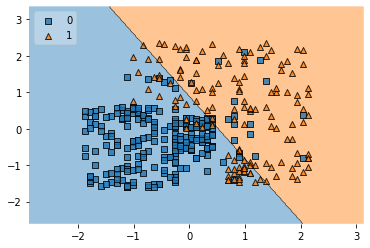

In [ ]:
# sns.scatterplot(data=dataset, x="EstimatedSalary", y="Age", hue="Purchased")
plot_decision_regions(X, Y, clf=classifier, legend=2)